<a href="https://colab.research.google.com/github/mcagriaksoy/COVID-19_Detector_X-RAY/blob/master/CNN_COVID_19_Detector_X_RAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#github.com/mcagriaksoy

from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:

PATH = 'drive/My Drive/COVID-19'  #change dir to your project folder

In [0]:

from __future__ import absolute_import, division, print_function, unicode_literals


In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 1.x
except Exception:
  pass
import tensorflow as tf

In [0]:
%matplotlib inline
from keras.models import Sequential, load_model
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint,History,EarlyStopping,LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam, Adadelta, RMSprop
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [0]:
dataset_dir = os.path.join(PATH, 'dataset')

In [0]:
train_covid_dir = os.path.join(dataset_dir, 'covid')  # directory with our training cat pictures
train_normal_dir = os.path.join(dataset_dir, 'normal')  # directory with our training dog pictures



In [0]:
num_covid_dir = len(os.listdir(train_normal_dir))
num_normal_dir = len(os.listdir(train_normal_dir))


In [0]:
print('total training covid images:', num_covid_dir)


total training covid images: 25


In [0]:
batch_size = 16
epochs = 28
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [0]:

image_gen_train = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.01,
        height_shift_range=0.01,
        rescale=1./255,
        shear_range=0.1,
        fill_mode='nearest',
        validation_split=0.2)

In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=dataset_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary') # set as training data

val_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=dataset_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary') # set as validation data


Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


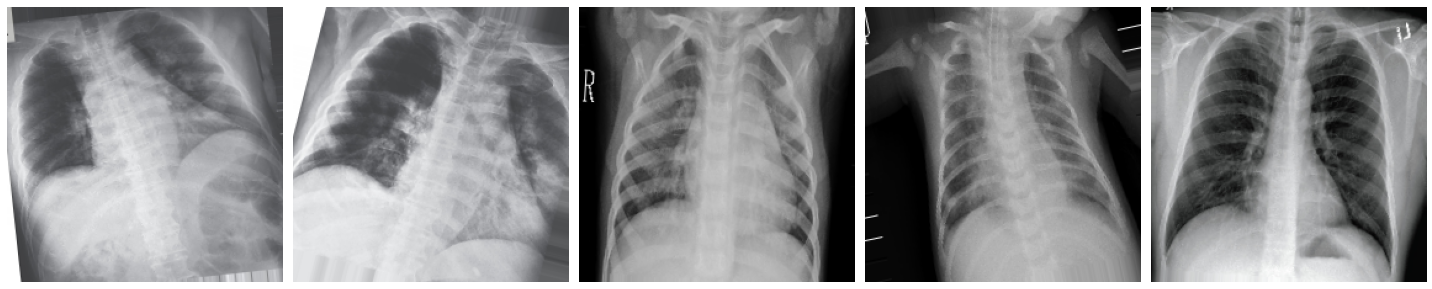

In [0]:
plotImages(sample_training_images[:5])


In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size= (3,3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),padding='same'))

model.add(BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(64, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(128, kernel_size =(3,3),padding='same'))
model.add(BatchNormalization(momentum=0.2, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(128,(3,3), padding='same' ))
model.add(BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(256, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(momentum=0.2, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(256, kernel_size= (3,3) ,padding='same'))
model.add(BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [0]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_10 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_11 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)     

In [0]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= val_data_gen.samples // batch_size
)

3/3 [==============================] - 14s 5s/step - loss: 0.4921 - acc: 0.7932 - val_loss: 2.3713 - val_acc: 0.7083
Epoch 2/28
3/3 [==============================] - 3s 900ms/step - loss: 0.0703 - acc: 0.9770 - val_loss: 0.2902 - val_acc: 0.9412
Epoch 3/28
3/3 [==============================] - 3s 853ms/step - loss: 0.3629 - acc: 0.9375 - val_loss: 0.1075 - val_acc: 0.9412
Epoch 4/28
3/3 [==============================] - 2s 613ms/step - loss: 0.1068 - acc: 0.9540 - val_loss: 0.0073 - val_acc: 1.0000
Epoch 5/28
3/3 [==============================] - 3s 851ms/step - loss: 0.0828 - acc: 0.9540 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 6/28
3/3 [==============================] - 3s 957ms/step - loss: 0.1452 - acc: 0.9167 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 7/28
3/3 [==============================] - 2s 807ms/step - loss: 0.0260 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 8/28
3/3 [==============================] - 2s 629ms/step - loss: 1.3444 - acc: 0.8676 - val_loss

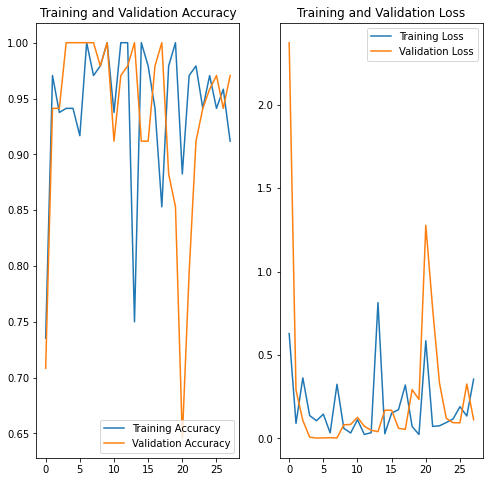

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()